# COGS 108 - Final Project: Wedding Costs Trends and Causes

# Overview

Our group’s goal was to research the correlation between the increase of wedding costs, the growing wedding economy, and people's expectations for their weddings. For our data, we gathered different wedding services’ insights on our research question, extracted important information from a wedding trends dataframe (provided to us by the Robbins Brothers), and conducted a survey to learn more about different age groups’ demands for a wedding. We conducted an analysis by looking at the distribution of responses from all of our data and comparing them to sources such as the WeddingWire, in order to determine the answer to our question. Though, we found that both the growing economy and people’s expectations influenced the rise of wedding costs, our findings may be limited by the number of respondents we received from our survey as well as the nature of our questions to this audience.

# Names

- Angela Wang
- Vivian Chiong
- Peony Lum
- Alan Tram

# Research Question

Over the past 5 years, are wedding costs increasing more so due to the growing wedding economy, or more so due to the increase in people's expectations and demands for their weddings?

## Background and Prior Work

Wedding planning is an integral part of many engaged couples in the United States. Marriage is a topic that has been predominantly unexplored in our childhood. We think it would be an interesting topic to explore because marriage is so prevalent in our lives yet it seems so foriegn. From choosing the venue and wedding caterer, finding a photographer, to purchasing the wedding bands, there are many thriving businesses in the wedding industry that deliver all of these services. All of these services add to the unsurmountable cost of weddings, both in time and money.

Based on the 2020 Newlywed Report by the company WeddingWire, we "nearly 60% of couples increase their initial budget, primarily due to finding things along the way that they felt they 'needed to have' and realizing they may have underestimated at first pass". From this, we understood that many couples upon researching wedding planning underestimate the amount of services and factors that are present in a traditional wedding. With regards to why couples spend more money on their wedding, WeddingWire found that "Fifty-four percent of couples increase their budget during planning, with 45% allocating additional funds to wedding items they fell in love with along the way."

We also found that couples' financial stability is correlated with the overall success of the marriage, particularly measured by divorce rate, in a 2014 research paper titled A Diamond is Forever. Couples who have higher financial stability tend to have lower divorce rates. We interpreted this data as older couples that typically have more resources financially are able to afford larger weddings and are less prone to certain marital challenges. Based on this information, we decided to investigate the trends of wedding costs and the causes as it may prove to be a predictor for marital success.

We are led to the hypothesis that wedding costs are increasing due to the growing expectations and demands of couples.

References (include links):
- 1) https://go.weddingwire.com/newlywed-report
- 2) https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2501480

# Hypothesis

We hypothesize that wedding costs are increasing due to the increasing demands and expectations of couples for their weddings. With the rise of social media platforms like Instagram and Pinterest, extravagant wedding ideas and wedding photos become extremely visible and accessible to everyone. On social media platforms, people post the highlight reel of their lives so it is no surprise that people share photos of their weddings online for everyone else to see. We hypothesize that this has increased the expectations of what is considered a must-have at a wedding, such as having a professional, high-end photographer to capture every moment. As a result, this has increased the prices in wedding businesses to meet the increasing value of their craft.

# Dataset(s)

Dataset Name: Wedding Data from Robbins Brothers
- Dataset Type: Excel Sheet
- Source: Robbins Brothers, originally from theweddingreport.com
- We received this wedding report, last updated in 2018 and collected originally from theweddingreport.com, from the Vice President of Marketing at Robbins Brothers. The dataset is composed of multiple tables spread across multiple sheets that describe wedding market data: weddings and engagements by month, wedding statistics by race, household income, education, race, sales and cost data for engagement rings, wedding bands, and much more in the LA, Riverside, and San Diego Areas. The total number of observations used was 165. The most current cost calculations are derived from 6,792 survey samples collected in 2018.

Dataset Name: Business
- Dataset Type: Excel Sheet
- Source: Self-made by contacting business in SoCal
- Our Business dataset includes 19 observations total. We contacted different types of wedding businesses, specifically wedding planners, venues, and caterers, to get their insight on whether their business prices were increasing due to expectations, the economy, both, or something else entirely and collected these responses into an excel sheet. The columns are Name (Name of the business), Type (Planner, Venue, Catering), Economy vs Expectations vs Both vs Other, and Response. 

Dataset Name: Survey
- Dataset Type: Google Form Responses as a Excel Sheet
- Source: Self-made by a public Google Form
- Our Survey dataset includes demographic information, household income data, as well as responses about people's current spending predictions for various wedding services, the engagement and wedding ring as multiple-choice responses. We have 168 observation responses total.

We plan to combine these datasets by first demonstrating the trends of wedding costs with the Wedding Data from Robbins Brothers, then exploring the reasons behind the trends with the responses from both business (Business data) and individuals (Survey data).

# Setup #

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Setting up the Business Dataset:

We wanted to gain some insight into our research question from different sources within the wedding industry, including wedding venues, planners, and caterers. We accomplished this by sending emails out to California-based wedding businesses asking them whether they believed that the increase in wedding costs are due to an increase in expectations or the economy. We received 20 responses to our emails. 

Setting up the Survey Dataset:

We created a survey using Google form with the purpose of getting data on the cost of weddings. Instead of asking for just a total amount, we broke down a wedding into different categories and asked for the expected cost for that component. The reason we broke it down into categories is because most people are not familiar with the cost of weddings and have not done research prior. We didn’t want them to make a blind guess, so the categories are an attempt to make the prediction as accurate as possible. The categories we chose were venue, ring, caterer, planner, photographer, and entertainment. In addition to the expected cost of each of the categories, we also asked for information like ethnicity, age, education, income, and location. The reason we asked for this information is because from prior research we have done, we realized that these can be variables that influence the cost of weddings. We were able to get 168 responses after posting multiple times to online sites like Facebook and Reddit. 

Some feedback we got about the survey questions is that some people felt that they were confused about the examples. For the actual data, so we exported the google form responses into an excel spreadsheet and downloaded it as a .csv file. Then we created a python file and imported libraries and the file. 

# Data Cleaning: Wedding Data from Robbins Brothers #

To clean the Wedding Data from Robbins Brothers, we first import each CSV which contains a single table of data as a Pandas dataframe. Then we check the tidiness of the dataframe by printing it out. We then rename any uninformative or lengthy column names, and drop columns that we don't use for the data analysis.

Below, we repeat the same data cleaning process on the following tables: Wedding Cost by Household Income, Average Engagement Ring Spending per Wedding by Year, Average Her Wedding Band Spending per Wedding by Year, Average His Wedding Band Spending per Wedding by Year -- in all 3 areas of San Diego, LA, and Riverside.

In [2]:
SDwedByIncome_df = pd.read_csv('csvs/SDWeddingsByHouseholdIncome.csv')
SDwedByIncome_df = SDwedByIncome_df.rename({'na':'Average Wedding Cost'}, axis='columns')

In [3]:
#print(SDwedByIncome_df.shape)
#print(SDwedByIncome_df.dtypes)
#SDwedByIncome_df

In [4]:
SDringsByYear_df = pd.read_csv('csvs/SDEngagementRingsSalesByYear.csv')
SDringsByYear_df = SDringsByYear_df.rename({'Average Engagement Ring Spending per Wedding':'Avg Ring$/Wedding'}, axis='columns') 
SDringsByYear_df = SDringsByYear_df.drop(columns=['Number of Weddings (Demand)','Total Sales'])

In [5]:
#print(SDringsByYear_df.shape)
#print(SDringsByYear_df.dtypes)
#SDringsByYear_df

In [6]:
SDherBandByYear_df = pd.read_csv('csvs/SDHerWeddingBandsSalesByYear.csv')
SDherBandByYear_df = SDherBandByYear_df.rename(
    {'Average Her Wedding Band Spending per Wedding':'Avg herBand$/Wedding'}, axis='columns')
SDherBandByYear_df = SDherBandByYear_df.drop(columns=['Number of Weddings (Demand)','Total Sales'])

In [7]:
#print(SDherBandByYear_df.shape)
#print(SDherBandByYear_df.dtypes)
#SDherBandByYear_df

In [8]:
SDhisBandByYear_df = pd.read_csv('csvs/SDHisWeddingBandsSalesByYear.csv')
SDhisBandByYear_df = SDhisBandByYear_df.rename(
    {'Average His Wedding Band Spending per Wedding':'Avg hisBand$/Wedding'}, axis='columns')
SDhisBandByYear_df = SDhisBandByYear_df.drop(columns=['Number of Weddings (Demand)','Total Sales'])

In [9]:
#print(SDhisBandByYear_df.shape)
#print(SDhisBandByYear_df.dtypes)
#SDhisBandByYear_df

In [10]:
RSwedByIncome_df = pd.read_csv('csvs/RiversideWeddingsByHouseholdIncome.csv')
RSwedByIncome_df = RSwedByIncome_df.rename({'na':'Average Wedding Cost'}, axis='columns')

# Convert to integer
RSwedByIncome_df['Percent of Weddings'] = RSwedByIncome_df['Percent of Weddings'].str.rstrip('%').astype('float') / 100.0
RSwedByIncome_df['No. of Weddings'] = RSwedByIncome_df['No. of Weddings'].str.replace(',', '').astype('int64')
RSwedByIncome_df['Average Wedding Cost'] = RSwedByIncome_df['Average Wedding Cost'].str.lstrip('$').str.replace(',', '').astype('int64')

In [11]:
#print(RSwedByIncome_df.shape)
#print(RSwedByIncome_df.dtypes)
#RSwedByIncome_df

In [12]:
RSringsByYear_df = pd.read_csv('csvs/RiversideEngagementRingsSalesByYear.csv')
RSringsByYear_df = RSringsByYear_df.rename(
    {'Average Engagement Ring Spending per Wedding':'Avg Ring$/Wedding'}, axis='columns')

# Convert to integer
RSringsByYear_df['Number of Weddings (Demand)'] = RSringsByYear_df['Number of Weddings (Demand)'].str.replace(',', '').astype('int64')
RSringsByYear_df['Avg Ring$/Wedding'] = RSringsByYear_df['Avg Ring$/Wedding'].str.lstrip('$').str.replace(',', '').astype('int64')
RSringsByYear_df['Total Sales'] = RSringsByYear_df['Total Sales'].str.lstrip('$').str.replace(',', '').astype('int64')

RSringsByYear_df = RSringsByYear_df.drop(columns=['Number of Weddings (Demand)','Total Sales'])

In [13]:
#print(RSringsByYear_df.shape)
#print(RSringsByYear_df.dtypes)
#RSringsByYear_df

In [14]:
RSherBandByYear_df = pd.read_csv('csvs/RiversideHerWeddingBandsSalesByYear.csv')
RSherBandByYear_df = RSherBandByYear_df.rename(
    {'Average Her Wedding Band Spending per Wedding':'Avg herBand$/Wedding'}, axis='columns')

# Convert to integer
RSherBandByYear_df['Number of Weddings (Demand)'] = RSherBandByYear_df['Number of Weddings (Demand)'].str.replace(',', '').astype('int64')
RSherBandByYear_df['Avg herBand$/Wedding'] = RSherBandByYear_df['Avg herBand$/Wedding'].str.lstrip('$').str.replace(',', '').astype('int64')
RSherBandByYear_df['Total Sales'] = RSherBandByYear_df['Total Sales'].str.lstrip('$').str.replace(',', '').astype('int64')

RSherBandByYear_df = RSherBandByYear_df.drop(columns=['Number of Weddings (Demand)','Total Sales'])

In [15]:
#print(RSherBandByYear_df.shape)
#print(RSherBandByYear_df.dtypes)
#RSherBandByYear_df

In [16]:
RShisBandByYear_df = pd.read_csv('csvs/RiversideHisWeddingBandsSalesByYear.csv')
RShisBandByYear_df = RShisBandByYear_df.rename(
    {'Average His Wedding Band Spending per Wedding':'Avg hisBand$/Wedding'}, axis='columns')

# Convert to integer
RShisBandByYear_df['Number of Weddings (Demand)'] = RShisBandByYear_df['Number of Weddings (Demand)'].str.replace(',', '').astype('int64')
RShisBandByYear_df['Avg hisBand$/Wedding'] = RShisBandByYear_df['Avg hisBand$/Wedding'].str.lstrip('$').str.replace(',', '').astype('int64')
RShisBandByYear_df['Total Sales'] = RShisBandByYear_df['Total Sales'].str.lstrip('$').str.replace(',', '').astype('int64')

RShisBandByYear_df = RShisBandByYear_df.drop(columns=['Number of Weddings (Demand)','Total Sales'])

In [17]:
#print(RShisBandByYear_df.shape)
#print(RShisBandByYear_df.dtypes)
#RShisBandByYear_df

In [18]:
LA_OCwedByIncome_df = pd.read_csv('csvs/LA_OCWeddingsByHouseholdIncome.csv')
LA_OCwedByIncome_df = LA_OCwedByIncome_df.rename({'na':'Average Wedding Cost'}, axis='columns')

# Convert to integer
LA_OCwedByIncome_df['Percent of Weddings'] = LA_OCwedByIncome_df['Percent of Weddings'].str.rstrip('%').astype('float') / 100.0
LA_OCwedByIncome_df['No. of Weddings'] = LA_OCwedByIncome_df['No. of Weddings'].str.replace(',', '').astype('int64')
LA_OCwedByIncome_df['Average Wedding Cost'] = LA_OCwedByIncome_df['Average Wedding Cost'].str.lstrip('$').str.replace(',', '').astype('int64')

In [19]:
#print(LA_OCwedByIncome_df.shape)
#print(LA_OCwedByIncome_df.dtypes)
#LA_OCwedByIncome_df

In [20]:
LA_OCringsByYear_df = pd.read_csv('csvs/LA_OCEngagementRingsSalesByYear.csv')
LA_OCringsByYear_df = LA_OCringsByYear_df.rename(
    {'Average Engagement Ring Spending per Wedding':'Avg Ring$/Wedding'}, axis='columns')

# Convert to integer
LA_OCringsByYear_df['Number of Weddings (Demand)'] = LA_OCringsByYear_df['Number of Weddings (Demand)'].str.replace(',', '').astype('int64')
LA_OCringsByYear_df['Avg Ring$/Wedding'] = LA_OCringsByYear_df['Avg Ring$/Wedding'].str.lstrip('$').str.replace(',', '').astype('int64')
LA_OCringsByYear_df['Total Sales'] = LA_OCringsByYear_df['Total Sales'].str.lstrip('$').str.replace(',', '').astype('int64')

LA_OCringsByYear_df = LA_OCringsByYear_df.drop(columns=['Number of Weddings (Demand)','Total Sales'])

In [21]:
#print(LA_OCringsByYear_df.shape)
#print(LA_OCringsByYear_df.dtypes)
#LA_OCringsByYear_df

In [22]:
LA_OCherBandByYear_df = pd.read_csv('csvs/LA_OCHerWeddingsBandsSalesByYear.csv')
LA_OCherBandByYear_df = LA_OCherBandByYear_df.rename(
    {'Average Her Wedding Band Spending per Wedding':'Avg herBand$/Wedding'}, axis='columns')

# Convert to integer
LA_OCherBandByYear_df['Number of Weddings (Demand)'] = LA_OCherBandByYear_df['Number of Weddings (Demand)'].str.replace(',', '').astype('int64')
LA_OCherBandByYear_df['Avg herBand$/Wedding'] = LA_OCherBandByYear_df['Avg herBand$/Wedding'].str.lstrip('$').str.replace(',', '').astype('int64')
LA_OCherBandByYear_df['Total Sales'] = LA_OCherBandByYear_df['Total Sales'].str.lstrip('$').str.replace(',', '').astype('int64')

LA_OCherBandByYear_df = LA_OCherBandByYear_df.drop(columns=['Number of Weddings (Demand)','Total Sales'])

In [23]:
#print(LA_OCherBandByYear_df.shape)
#print(LA_OCherBandByYear_df.dtypes)
#LA_OCherBandByYear_df

In [24]:
LA_OChisBandByYear_df = pd.read_csv('csvs/LA_OCHisWeddingBandsSalesByYear.csv')
LA_OChisBandByYear_df = LA_OChisBandByYear_df.rename(
    {'Average His Wedding Band Spending per Wedding':'Avg hisBand$/Wedding'}, axis='columns')

# Convert to integer
LA_OChisBandByYear_df['Number of Weddings (Demand)'] = LA_OChisBandByYear_df['Number of Weddings (Demand)'].str.replace(',', '').astype('int64')
LA_OChisBandByYear_df['Avg hisBand$/Wedding'] = LA_OChisBandByYear_df['Avg hisBand$/Wedding'].str.lstrip('$').str.replace(',', '').astype('int64')
LA_OChisBandByYear_df['Total Sales'] = LA_OChisBandByYear_df['Total Sales'].str.lstrip('$').str.replace(',', '').astype('int64')

LA_OChisBandByYear_df = LA_OChisBandByYear_df.drop(columns=['Number of Weddings (Demand)','Total Sales'])

In [25]:
#print(LA_OChisBandByYear_df.shape)
#print(LA_OChisBandByYear_df.dtypes)
#LA_OChisBandByYear_df

## More Data Cleaning : Wedding Data from Robbins Brothers #

Now, we want to investigate wedding costs vs. household income per county in order to see if the different counties have similar wedding cost trends. To clean the data further, we drop the Percent of Weddings and No. of Weddings columns because we only care about the wedding cost and income variables.

In [26]:
SDAvgWeddingCosts = pd.DataFrame()
SDAvgWeddingCosts = SDwedByIncome_df.drop(columns = ['Percent of Weddings','No. of Weddings'])
RSAvgWeddingCosts = pd.DataFrame()
RSAvgWeddingCosts = RSwedByIncome_df.drop(columns = ['Percent of Weddings','No. of Weddings'])
LAAvgWeddingCosts = pd.DataFrame()
LAAvgWeddingCosts = LA_OCwedByIncome_df.drop(columns = ['Percent of Weddings','No. of Weddings'])

# Data Analysis : Wedding Data from Robbins Brothers #

Text(0.5, 1.0, 'SD Wedding Spending by Household Income')

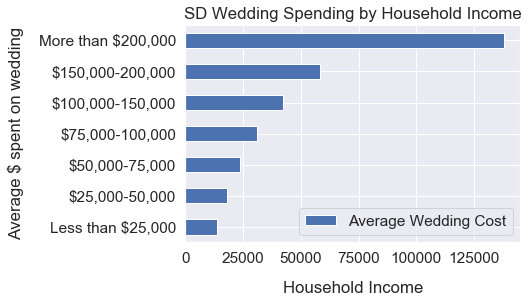

In [60]:
SDAvgWeddingCosts.plot.barh(x= 'Household Income', y= 'Average Wedding Cost')
sns.set(font_scale=1.4)
plt.xlabel("Household Income", labelpad=15)
plt.ylabel("Average $ spent on wedding", labelpad=15)
plt.title('SD Wedding Spending by Household Income')

This bar chart shows that in the SD area, the greater the household income, the greater the average money spent on weddings. The curve follows an almost exponential trend. In comparison to Riverside and LA/OC counties, San Diego has a near identical wedding spending pattern based on household income.

Text(0.5, 1.0, 'Riverside Wedding Spending by Household Income')

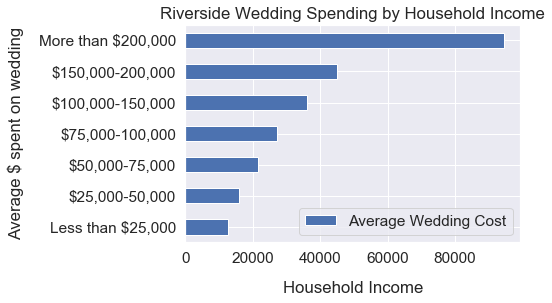

In [28]:
RSAvgWeddingCosts.plot.barh(x= 'Household Income', y= 'Average Wedding Cost')
sns.set(font_scale=1.4)
plt.xlabel("Household Income", labelpad=15)
plt.ylabel("Average $ spent on wedding", labelpad=15)
plt.title('Riverside Wedding Spending by Household Income')

This bar chart shows that in the Riverside area, the greater the houshold income, the greater the average money spent on weddings. The curve follows an almost exponential trend. In comparison to San Diego and LA/OC counties, Riverside has a near identical wedding spending pattern based on household income.

Text(0.5, 1.0, 'LA Wedding Spending by Household Income')

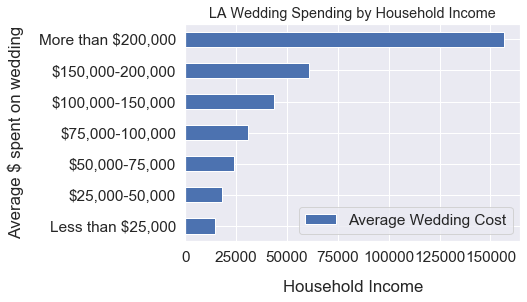

In [29]:
LAAvgWeddingCosts.plot.barh(x= 'Household Income', y= 'Average Wedding Cost')
sns.set(font_scale=1.2)
plt.xlabel("Household Income", labelpad=15)
plt.ylabel("Average $ spent on wedding", labelpad=15)
plt.title('LA Wedding Spending by Household Income')

This bar chart shows that in the LA area, the greater the houshold income, the greater the average money spent on weddings. The curve follows an almost exponential trend.In comparison to Riverside and SD counties, Los Angeles has a near identical wedding spending pattern based on household income.

Looking at all the bar charts, all 3 areas have nearly identical trends of Average Wedding Cost vs. Household Income aside from the the spending of richer households with income levels over $200,000. The highest costs come from the LA area, followed by SD, and lastly Riverside. This can be explained simply because Riverside, being a rural county, will most likely have a smaller population of high income households as opposed to LA, a popular city area.

Now that we have established similar wedding cost trends across the 3 areas, we can now safely take the average of wedding costs from all 3 areas. We define SoCal as the areas of SD, LA, and Riverside.

### Average Engagement Ring Spending per Wedding in Socal (LA, Riverside, San Diego) ###

In [30]:
# Take average between the dataframes
socalringsByYear = pd.concat([SDringsByYear_df, RSringsByYear_df, LA_OCringsByYear_df]).groupby(level=0).mean()

Text(0.5, 1.0, 'Average Engagement Ring Spending in SoCal')

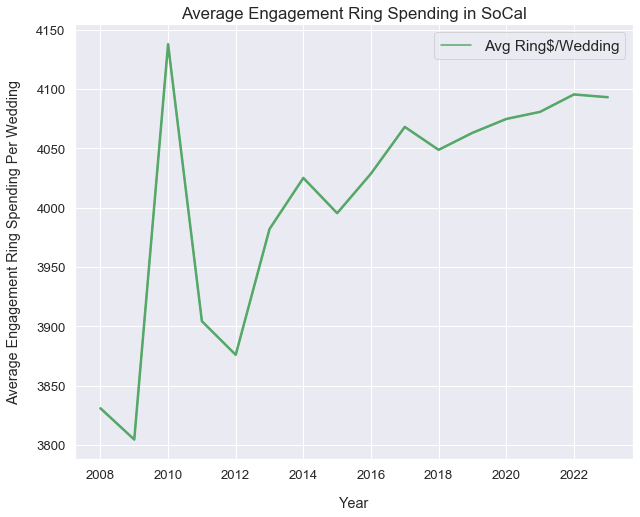

In [31]:
socalringsByYear.head(n=16)
socalringsByYear.plot.line(x='Year', y='Avg Ring$/Wedding', color='g')
sns.set(font_scale=1.4)
socalringsByYear.set_index('Year')['Avg Ring$/Wedding'].plot(figsize=(10, 8), linewidth=2.5, color='g')
plt.xlabel("Year", labelpad=15)
plt.ylabel("Average Engagement Ring Spending Per Wedding", labelpad=15)
plt.title('Average Engagement Ring Spending in SoCal')

Average engagement rings spending per wedding is increasing, with the current average cost being around $4,100. Though an unexplored spike in 2010 (an interesting data point that could possibly be explored by future researchers), we clearly see a trend upward from 2008 in regards to average engagement ring spendings.

In [32]:
# Take average between the dataframes
socalherBandByYear = pd.concat([SDherBandByYear_df, RSherBandByYear_df, LA_OCherBandByYear_df]).groupby(level=0).mean()

Text(0.5, 1.0, 'Average Her Wedding Band Spending in SoCal')

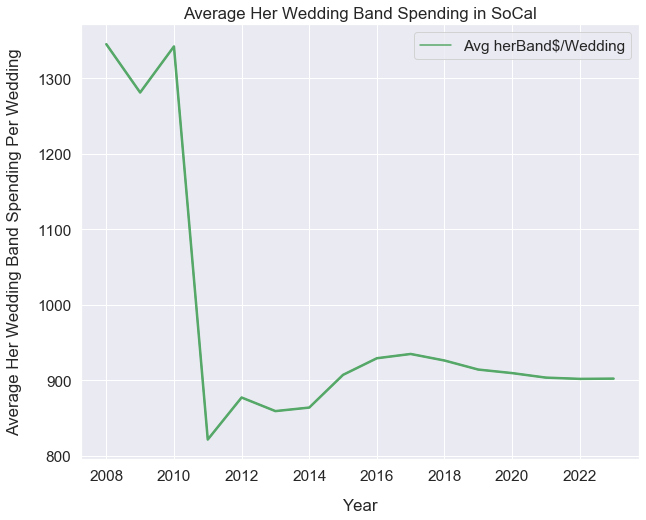

In [33]:
socalherBandByYear.head(n=16)
socalherBandByYear.plot.line(x='Year', y='Avg herBand$/Wedding', color='g')
sns.set(font_scale=1.4)
socalherBandByYear.set_index('Year')['Avg herBand$/Wedding'].plot(figsize=(10, 8), linewidth=2.5, color='g')
plt.xlabel("Year", labelpad=15)
plt.ylabel("Average Her Wedding Band Spending Per Wedding", labelpad=15)
plt.title('Average Her Wedding Band Spending in SoCal')

Average her wedding band spending per wedding is gradually decreasing, with the current average cost being around $900. Contrasting engagement rings, wedding bands seem to have dipped in spending trends. Our research team correlates this with the idea that wedding bands are falling out of cultural practices. 

In [34]:
# Take average between the dataframes
socalhisBandByYear = pd.concat([SDhisBandByYear_df, RShisBandByYear_df, LA_OChisBandByYear_df]).groupby(level=0).mean()
socalhisBandByYear

,Year,Avg hisBand$/Wedding
0,2008.0,1080.666667
1,2009.0,898.000000
2,2010.0,881.333333
3,2011.0,603.333333
4,2012.0,542.000000
5,2013.0,555.000000
6,2014.0,579.666667
7,2015.0,572.333333
8,2016.0,539.333333
9,2017.0,544.000000


Text(0.5, 1.0, 'Average His Wedding Band Spending in SoCal')

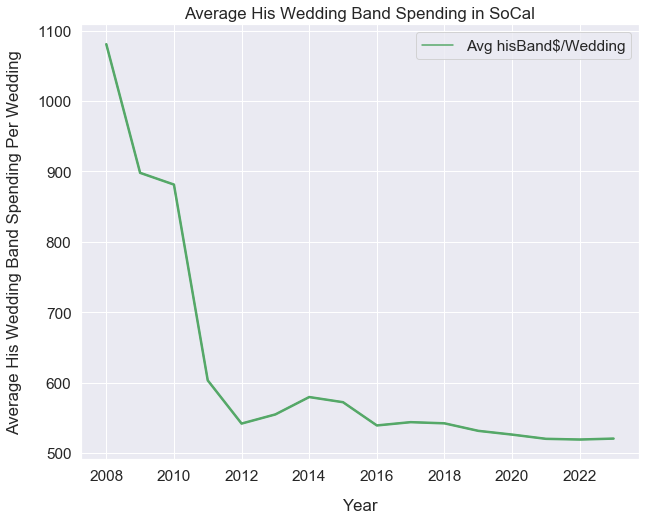

In [35]:
socalhisBandByYear.head(n=16)
socalhisBandByYear.plot.line(x='Year', y='Avg hisBand$/Wedding', color='g')
sns.set(font_scale=1.4)
socalhisBandByYear.set_index('Year')['Avg hisBand$/Wedding'].plot(figsize=(10, 8), linewidth=2.5, color='g')
plt.xlabel("Year", labelpad=15)
plt.ylabel("Average His Wedding Band Spending Per Wedding", labelpad=15)
plt.title('Average His Wedding Band Spending in SoCal')

Average his wedding band spending per wedding is gradually decreasing, with the current average cost being around $500. Contrasting engagement rings, wedding bands seem to have dipped in spending trends. Our research team correlates this with the idea that wedding bands are falling out of cultural practices. 

Based on these graphs, we can see that Engagement Ring spending has continued to grow for the past decade, while Her and His Wedding Band spending have significantly decreased. This gradual decrease in cost of wedding bands may be a response to the increasing cost of engagement rings, a shift in how society values each, or a combination of factors. 

We decided to investigate the increase of cost in engagement rings and weddings, contacting wedding businesses for their insight.

# Data Cleaning: Business Dataset #

In [36]:
business_df = pd.read_csv('WeddingBusinessData.csv')
print(business_df.shape)
print(business_df.dtypes)

(19, 4)
Business                                    object
Type (Planner, Venue, Catering)             object
Economy vs Expectations vs Both vs Other    object
Response                                    object
dtype: object


In WeddingBusinessData.csv, we collected wedding cost insight from 17 total businesses, differentiating them by wedding business type (planner, venue, or caterer). We collect their responses in the Response column. Then we characterize their overall response in the third column: Economy, Expectations, Both, or Other. Economy means that the business attributes the growing wedding costs more towards the growing wedding economy and business expenses, Expectations means that the business attributes the growing wedding costs more towards couple's growing demands and expecations, both means the business attributes the growing wedding costs to both the growing wedding economy as well as people's growing expecations, and other means the business attributes the the growing wedding cost to another reason entirely.

In [37]:
business_df = business_df.drop(columns = ['Business'])
business_df = business_df.rename({'Type (Planner, Venue, Catering)':'Type', 'Economy vs Expectations vs Both vs Other':'Cause'}, axis='columns')
business_df

,Type,Cause,Response
0,Planner,Economy,I would say growing budgets were due to a grow...
1,Planner,Expectations,Costs/wishlists are growing due to the instagr...
2,Planner,Both,Wedding costs have increased over the last 5 y...
3,Planner,Other,I believe there are many factors that cause we...
4,Planner,Both,I think it is a combination of the two. As we...
5,Venue,Both,Pricing has definitely gone up the past 5 year...
6,Catering,Expectations,I would say the costs are increasing as people...
7,Catering,Expectations,We think they are increasing due to high expec...
8,Catering,Expectations,increase in people's expectations ( mislead by...
9,Catering,Both,"Expenses (Food, labor, taxes, etc.) rising -> ..."


The dataset is clean. We check this by looking at the dtypes of the columns and printing out the dataframe. We can see above that the dataset is in a rectangular shape and there are no NaN values. Each variable we measure is in a seperate column, and every observation of a variable is in a different row. We drop the 'Reponse' and 'Business' column in order to remove the PII of the businesses.

# Data Analysis: Business Dataset #

Text(0.5, 1.0, 'Cause of Increase in Wedding Costs')

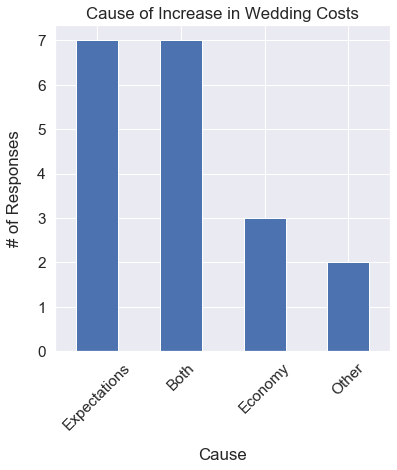

In [38]:
business_df['Cause'].value_counts().plot.bar(figsize=(6, 6))
plt.xticks(rotation=45)
plt.xlabel("Cause", labelpad=15)
plt.ylabel("# of Responses", labelpad=15)
plt.title('Cause of Increase in Wedding Costs')

We can see that most businesses indicated that there is an increase of weddings expectations and demands amongst couples, leading to the increase of wedding costs more so than the growing wedding economy or growing business expenses. Calling on wedding professinonals for their insights adds additional credibility to us as their insights align with ours

In [39]:
planner = [1, 2, 2, 2] # Planner: Economy: 1, Expectations: 2, Both: 2, Other: 2
venue = [0, 1, 3, 0] # Venues: Economy: 0, Expectations: 1, Both: 3, Other: 0
catering = [2, 4, 2, 0] # Caterers: Economy: 2, Expectations: 4, Both: 2, Other: 0

In [40]:
data = np.array([planner, venue, catering])
data

array([[1, 2, 2, 2],
       [0, 1, 3, 0],
       [2, 4, 2, 0]])

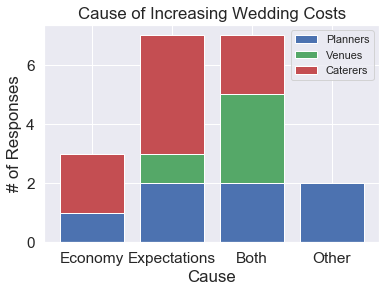

In [41]:
btypes = ['Planners', 'Venues', 'Caterers']
colors = ['b', 'g', 'r']

X = np.arange(4)
for i in range(data.shape[0]):
  plt.bar(X, data[i], bottom = np.sum(data[:i], axis = 0), color = colors[i % len(colors)])

quarter = ["Economy", "Expectations", "Both", "Other"]
plt.xticks(X, quarter)
plt.ylabel("# of Responses")
plt.xlabel("Cause")
plt.title('Cause of Increasing Wedding Costs')
plt.legend(btypes, prop={"size":11})
plt.show()

In this stacked bar chart, we notice that growing demands and expectations proves to be an important factor in the increase of wedding costs across types of wedding businesses, including wedding planners, wedding venues, and wedding catering.

According to wedding planners, the cause of increasing wedding costs is across the board, while wedding venues and caterers are slightly leaning more towards expectations.

Now let's gain some insight on wedding demands and expectations of individuals by looking at our survey datset.

# Data Cleaning: Survey Dataset #

In order to clean the data, we had to clean the free response sections such as race/ethnicity as well as filter the data to only include California responses. We did this by grouping mixed race together into one category and only including the participant response if they stated that they were from California. The reason we focused on California is because more than half of our survey results were from those based in California, so making predictions about those from other locations would most likely be inaccurate due to lack of data. Furthermore, since the values we gathered for the price of different wedding categories were ranges and therefore string types, we had to also find a way to calculate a representative numerical value for each price range such that we could calculate the total cost. We ended up using the median values for each price range, and totaled the costs across each wedding category to determine the total cost a participant would spend on their wedding.

In [42]:
SurveyDF = pd.read_csv('Survey_170_Data.csv')

SurveyDF.head()

print(SurveyDF.columns)

num_list=[]

for x in range(0,165):
    num_list.append(x)
    
#print(num_list)
#idx = pd.Index(['Timestamp'], name= num_list)

SurveyDF = SurveyDF.drop(columns=['Timestamp'])

Index(['Timestamp',
       'Where are you located? Please indicate which state if you are not in California.',
       'Which of the following Counties do you live in?', 'Age',
       'Which of these best describes your Ethnic group?',
       'Which is the highest level of Education you have Completed?',
       'Which of these best resembles your household income?',
       'How many people do you have in your household?',
       'Are you currently employed?',
       'If you answered "No" to the question above, have you ever been employed? (If you answered "Yes" to the previous question, please select "N/A")',
       'If you are currently a student, what is your expected salary after graduation?',
       'How much would you spend on a Wedding Venue?',
       'How much would you spend on a Wedding/Engagement Ring?',
       'How much would you spend on a Caterer (price per person)?',
       'How much would you spend on wedding planners?',
       'How much would you spend on a wedding photo

In [43]:
SurveyDF.rename(columns = {'Where are you located? Please indicate which state if you are not in California.':'Location'
                          ,'Which of the following Counties do you live in?' : 'CA County',
                          'Which of these best describes your Ethnic group?' : 'Demographic',
                          'Which is the highest level of Education you have Completed?': 'Education',
                          'Which of these best resembles your household income?': 'Household Income',
                           'How many people do you have in your household?': 'Amt in Household',
                           'Are you currently employed?': 'Employed',
                           'If you answered "No" to the question above, have you ever been employed? (If you answered "Yes" to the previous question, please select "N/A")': 'Ever Employed',
                           'If you are currently a student, what is your expected salary after graduation?': 'Expected Salary',
                           'How much would you spend on a Wedding Venue?': 'Venue',
                           'How much would you spend on a Wedding/Engagement Ring?': 'Ring',
                           'How much would you spend on a Caterer (price per person)?': 'Caterer',
                           'How much would you spend on wedding planners?': 'Planner',
                           'How much would you spend on a wedding photographer?': 'Photographer',
                           'How much would you spend on entertainment?': 'Entertainment'
                          }, inplace = True) 

SurveyDF.head()

,Location,CA County,Age,Demographic,Education,Household Income,Amt in Household,Employed,Ever Employed,Expected Salary,Venue,Ring,Caterer,Planner,Photographer,Entertainment
0,California,San Diego,15 - 19,white & Asian,High School,"More than $200,000",4,No,No,"75,000","Less than $1,000","Less than $1,000",$50 - $75,$100-$500,$1000-$2500,$500-$1000
1,California,San Diego,20 - 24,Asian,Some College,"$50,000 - $75,000",3,No,No,"$50,000","$3,500 - $11,000","$2,500 - $5,000",$120 - $150,$1000-$2000,$2500-$5000,$2000-$5000
2,California,San Diego,20 - 24,Hispanic or Latino,Some College,"More than $200,000",4,Yes,NaN,"85,000","$3,500 - $11,000","$5,000 - $10,000",$50 - $100,$1000-$2000,$2500-$5000,$1000-$2000
3,California,San Diego,20 - 24,Mixed - Asian and Black,Some College,"$75,000 - $100,000",3,No,No,Don't Know/Unsure,"$1,000 - $3,500","Less than $1,000",$50 - $75,$100-$500,$1000-$2500,<$500
4,California,San Bernardino,20 - 24,Asian and white,Some College,"$100,000 - $150,000",3,No,Yes,"After grad school, potentially $70-100k a year...","$1,000 - $3,500","$2,500 - $5,000",$50 - $100,$500-$1000,$1000-$2500,$500-$1000


Since we want to focus in on participants in California only, we will filter our dataset to just California results.

In [44]:
# filter to just California
cal_data = SurveyDF[ SurveyDF.Location == "California"]
cal_data = cal_data.reset_index()

print(cal_data)

     index    Location        CA County      Age              Demographic  \
0        0  California        San Diego  15 - 19            white & Asian   
1        1  California        San Diego  20 - 24                    Asian   
2        2  California        San Diego  20 - 24       Hispanic or Latino   
3        3  California        San Diego  20 - 24  Mixed - Asian and Black   
4        4  California  San Bernardino   20 - 24         Asian and white    
..     ...         ...              ...      ...                      ...   
115    160  California        LA/Orange  20 - 24       White or Caucasian   
116    161  California        LA/Orange  20 - 24                    Asian   
117    162  California        LA/Orange  15 - 19       White or Caucasian   
118    164  California        San Diego  20 - 24                    Asian   
119    166  California        San Diego  20 - 24       White or Caucasian   

        Education     Household Income Amt in Household Employed  \
0     H

We also want to get a better sense of total wedding costs, thus we will use the average of each price range and sum them up to get the total amount spent for each participant.

In [45]:
# calculate total wedding cost
total = []

for index, row in cal_data.iterrows():
    temp_total = 0
    
    # venue
    if row['Venue'] == "Less than $1,000":
        temp_total += 500
    elif row['Venue'] == "$1,000 - $3,500":
        temp_total += 2250
    elif row['Venue'] == "$3,500 - $11,000":
        temp_total += 7250
    elif row['Venue'] == "$11,000 - $20,000":
        temp_total += 15500
    elif row['Venue'] == "More than $20,000":
        temp_total += 20000
    
    # ring
    if row['Ring'] == "Less than $1,000":
        temp_total += 500
    elif row['Ring'] == "$1,000 - $2,500":
        temp_total += 1750
    elif row['Ring'] == "$2,500 - $5,000":
        temp_total += 3750
    elif row['Ring'] == "$5,000 - $10,000":
        temp_total += 7500
    elif row['Ring'] == "More than $10,000":
        temp_total += 10000
        
    # caterer
    if row['Caterer'] == "$50 - $75":
        temp_total += 60
    elif row['Caterer'] == "$50 - $100":
        temp_total += 75
    elif row['Caterer'] == "$120 - $150":
        temp_total += 135
    elif row['Caterer'] == "$100 - $200":
        temp_total += 150
    
    # planner
    if row['Planner'] == "$100-$500":
        temp_total += 250
    elif row['Planner'] == "$500-$1000":
        temp_total += 750
    elif row['Planner'] == "$1000-$2000":
        temp_total += 1500
    elif row['Ring'] == "$2000+":
        temp_total += 2000
    
    # photographer
    if row['Photographer'] == "$1000-$2500":
        temp_total += 1750
    elif row['Photographer'] == "$2500-$5000":
        temp_total += 3750
    elif row['Photographer'] == "$5000 - $10,000":
        temp_total += 7500
    
    # entertainment
    if row['Entertainment'] == "<$500":
        temp_total += 250
    elif row['Entertainment'] == "$500-$1000":
        temp_total += 750
    elif row['Entertainment'] == "$1000-$2000":
        temp_total += 1500
    elif row['Entertainment'] == "$2000-$5000":
        temp_total += 3500
    elif row['Entertainment'] == "$5000+":
        temp_total += 10000
        
    total.append(temp_total)
    
print(len(total))
len(cal_data['Entertainment'])

120


120

In [46]:
#add total as a column to cal_data
cal_data['Total Cost ($)'] = total

In [47]:
# clean demographic

for i in range(0,len(cal_data)):
    ethn = cal_data.loc[i,'Demographic']
    ethn = ethn.strip()
    
    if ethn == 'Mixed- flipino/puertorican/american' or ethn == 'white & Asian' or ethn == 'Mixed Race/ White & Arab' or ethn == 'Asian and white' or ethn == 'Mixed - Asian and Black' or ethn == 'Asian/Hispanic':
        cal_data.loc[i,'Demographic'] = 'Mixed Race'

cal_data['Demographic'].value_counts()

Asian                 75
White or Caucasian    20
Hispanic or Latino    19
Mixed Race             5
Arab                   1
Name: Demographic, dtype: int64

# Data Analysis: Survey Dataset #

Now let's take a look at the overall demographics for our participants.

Text(0.5, 1, '# of Survey-takers by Age')

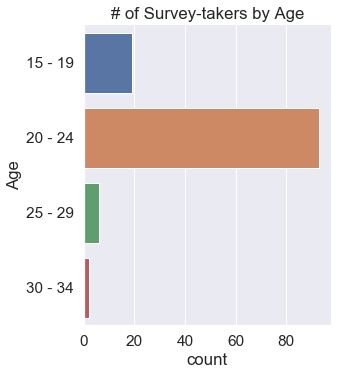

In [48]:
#Barchart of age 
sns.catplot(y='Age',kind='count',data=cal_data)

age_graph = plt.gcf()
plt.title('# of Survey-takers by Age')

This bar chart shows us that most of our respondents were between the ages of 20-24, which either means they are still in school or just starting out with their career.

Text(0.5, 1, '# of Survey-takers by Ethnicity')

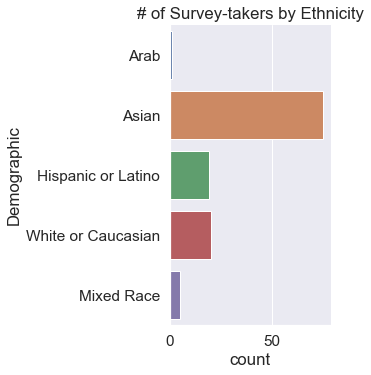

In [49]:
#Barchart of Ethnicity
sns.catplot(y='Demographic',kind='count',data=cal_data,order=['Arab','Asian','Hispanic or Latino','White or Caucasian','Mixed Race'])

ethnicity_graph = plt.gcf()
plt.title('# of Survey-takers by Ethnicity')

This bar chart shows us the ethnicity of our respondents. Though there are respondents from different ethnic backgrounds, most identified as Asian.

Text(0.5, 1, '# of Survey-takers by Household Income')

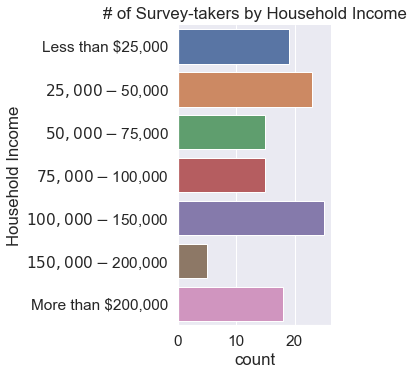

In [50]:
#Barchart of Household Income 
sns.catplot(y='Household Income',kind='count',data=cal_data,order=['Less than $25,000','$25,000 - $50,000','$50,000 - $75,000','$75,000 - $100,000','$100,000 - $150,000','$150,000 - $200,000','More than $200,000'])

HH_Income_graph = plt.gcf()
plt.title('# of Survey-takers by Household Income')

This bar chart displays the household income for each of our respondents. As we can see, there is a pretty large distribution between the different options, though most respondents seem to come from a household income of $100,000 - $150,000.

Let's now take a look at the distribution of responses regarding the different wedding services.

Text(0.5, 1, "Respondents' Expected Cost of Wedding Venue")

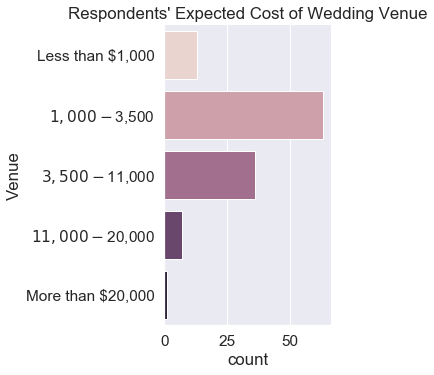

In [51]:
#Barchart of responses regarding Venue costs
sns.catplot(y='Venue',kind='count',data= cal_data,palette="ch: 9",order=['Less than $1,000','$1,000 - $3,500','$3,500 - $11,000','$11,000 - $20,000','More than $20,000'])

venue_graph = plt.gcf()
plt.title('Respondents\' Expected Cost of Wedding Venue')

This bar chart displays the number of responses under each price range for wedding venues. We can see that the overall distribution of this graph is skewed right, as the most common response was the $1,000 - $3,500 price range and the number of responses begin to decrease as the price range increases.

Text(0.5, 1, "Respondents' Expected Cost of Wedding/Engagement Ring")

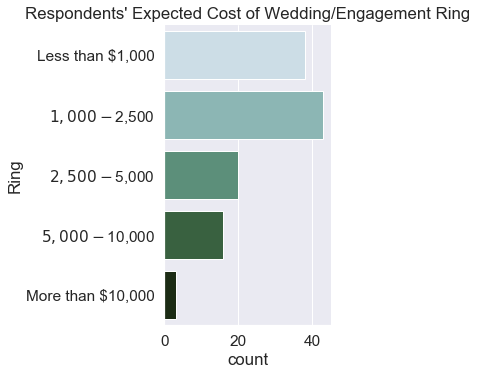

In [52]:
#Barchart of responses regarding Ring costs
sns.catplot(y='Ring',kind='count',data= cal_data,palette="ch: 4.6",order=['Less than $1,000','$1,000 - $2,500','$2,500 - $5,000','$5,000 - $10,000','More than $10,000'])

Ring_graph = plt.gcf()
plt.title('Respondents\' Expected Cost of Wedding/Engagement Ring')

This bar chart represents the number of responses under each price range for Wedding/Engagement rings. The distribution of this graph is skewed right, as the most common price ranges were 'Less than $1,000' and '$1,000 - $2,500', then begins to decrease as the price ranges increase.

Text(0.5, 1, "Respondents' Expected Cost of Wedding Catering")

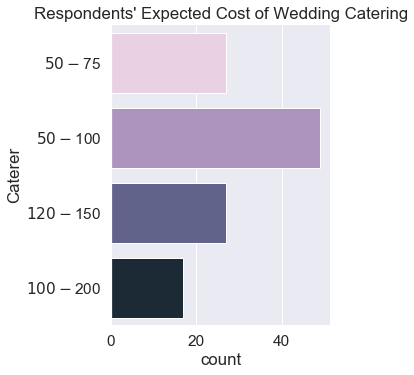

In [53]:
#Barchart of responses regarding Caterer costs
sns.catplot(y='Caterer',kind='count',data= cal_data,palette="ch: 8.5",order=['$50 - $75','$50 - $100','$120 - $150','$100 - $200'])

caterer_graph = plt.gcf()
plt.title('Respondents\' Expected Cost of Wedding Catering')

This bar chart displays the number of responses under each price range for Wedding Catering. The distribution of this graph closely resembles a normal distribution, with a right skew. The most common response was the '$50 - $100' price range followed by both the '$50 - $75' and '$120 - $150' price ranges.

Text(0.5, 1, "Respondents' Expected Cost of Wedding Planner")

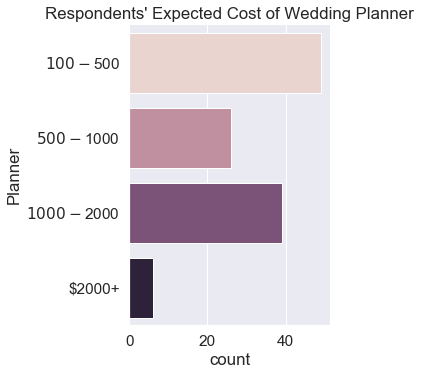

In [54]:
#Barchart of responses regarding Planner costs
sns.catplot(y='Planner',kind='count',data= cal_data,palette="ch: 9",order=['$100-$500','$500-$1000','$1000-$2000','$2000+'])

planner_graph = plt.gcf()
plt.title('Respondents\' Expected Cost of Wedding Planner')

This bar chart depicts the number of responses under each price range for Wedding Planners. This graph follows a bimodal distribution as the two most common responses were the '$100 - $500' and '$1,000 - $2,000' price ranges.

Text(0.5, 1, "Respondents' Expected Cost of Wedding Photographer")

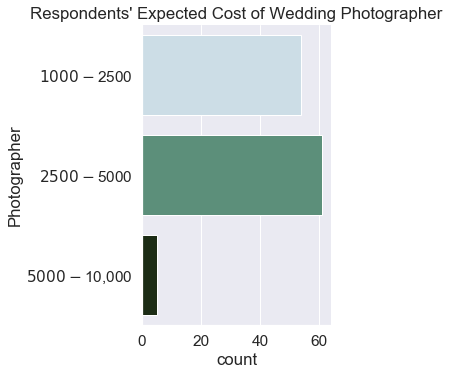

In [55]:
#Barchart of responses regarding Photographer costs
sns.catplot(y='Photographer',kind='count',data= cal_data, palette="ch: 1.6",order=['$1000-$2500','$2500-$5000','$5000 - $10,000'])

photographer_graph = plt.gcf()
plt.title('Respondents\' Expected Cost of Wedding Photographer')

This bar chart shows the number of responses under each price range for a Wedding Photographer. This graph is skewed right as both the lower price ranges of '$1,000 - $2,500' and '$2,500 - '$2,500 - $5,000' were very common amongst our respondents, whereas the '$5,000 - $10,000' price range yielded a small amount of responses.

Text(0.5, 1, "Respondents' Expected Cost of Wedding Entertainment")

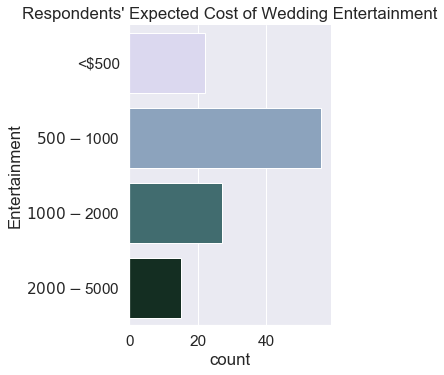

In [56]:
#Barchart of responses regarding Entertainment costs
sns.catplot(y='Entertainment',kind='count',data= cal_data,palette="ch: 11",order=['<$500','$500-$1000','$1000-$2000','$2000-$5000'])

entertainment_graph = plt.gcf()
plt.title('Respondents\' Expected Cost of Wedding Entertainment')

This bar chart displays the number of responses under each price range for Wedding Entertainment. This graph closely resembles a normal distribution, though slightly skewed right. We can see that the '<$500' and '$1,000 - $2,000' price ranges yield relatively the same amount of responses, while the '$500 - $1,000' price range yielded the most responses.

Now that we have a general idea of the distribution of responses for the price willing to be spent on each individual wedding service, we will now take a look at some graphs that take into account the total amount of money willing to be spent for a wedding for every respondent.

Text(0.5, 1.0, 'Distribution of Total Cost of Wedding Expecations')

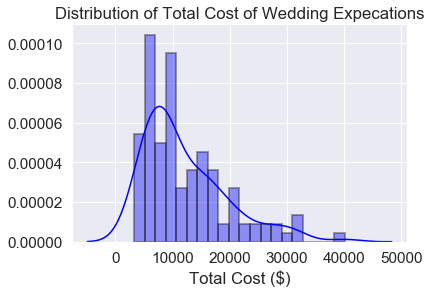

In [57]:
#Barchart of responses regarding Total Wedding costs
sns.distplot(cal_data['Total Cost ($)'], bins = 20, hist_kws=dict(edgecolor="k", linewidth=2), color = 'blue')

total_cost_graph = plt.gcf()
plt.title('Distribution of Total Cost of Wedding Expecations')

This distribution histogram displays the distribution for total wedding cost per respondent. We can see that this graph is skewed right, as most of our respondents would spend an average amount of approximately $10,000 on their wedding. Though there were some respondents who would spend an average greater than this range, it was a very small subset of respondents.

We can therefore conclude from this graph, that most people in California would be willing to spend on average approximately $10,000 on their wedding.

We now want to see if employment history has any effect on a respondent's choice of price ranges.

In [58]:
#Separate the people who have been employed before and those who have not
emp_hist = []

for i in range(0, len(cal_data)):
    employed = cal_data.loc[i,'Employed']
    
    if employed == 'Yes':
        emp_hist.append('Employed Before')
    else:
        employed = cal_data.loc[i,'Ever Employed']
        if employed == 'Yes':
            emp_hist.append('Employed Before')
        else:
            emp_hist.append('Not Employed Before')

cal_data['Employment History'] = emp_hist

cal_data

,index,Location,CA County,Age,Demographic,Education,Household Income,Amt in Household,Employed,Ever Employed,Expected Salary,Venue,Ring,Caterer,Planner,Photographer,Entertainment,Total Cost ($),Employment History
0,0,California,San Diego,15 - 19,Mixed Race,High School,"More than $200,000",4,No,No,"75,000","Less than $1,000","Less than $1,000",$50 - $75,$100-$500,$1000-$2500,$500-$1000,3810,Not Employed Before
1,1,California,San Diego,20 - 24,Asian,Some College,"$50,000 - $75,000",3,No,No,"$50,000","$3,500 - $11,000","$2,500 - $5,000",$120 - $150,$1000-$2000,$2500-$5000,$2000-$5000,19885,Not Employed Before
2,2,California,San Diego,20 - 24,Hispanic or Latino,Some College,"More than $200,000",4,Yes,NaN,"85,000","$3,500 - $11,000","$5,000 - $10,000",$50 - $100,$1000-$2000,$2500-$5000,$1000-$2000,21575,Employed Before
3,3,California,San Diego,20 - 24,Mixed Race,Some College,"$75,000 - $100,000",3,No,No,Don't Know/Unsure,"$1,000 - $3,500","Less than $1,000",$50 - $75,$100-$500,$1000-$2500,<$500,5060,Not Employed Before
4,4,California,San Bernardino,20 - 24,Mixed Race,Some College,"$100,000 - $150,000",3,No,Yes,"After grad school, potentially $70-100k a year...","$1,000 - $3,500","$2,500 - $5,000",$50 - $100,$500-$1000,$1000-$2500,$500-$1000,9325,Employed Before
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,160,California,LA/Orange,20 - 24,White or Caucasian,Some College,"$100,000 - $150,000",4,No,Yes,70000,"$3,500 - $11,000","$1,000 - $2,500",$50 - $100,$500-$1000,$2500-$5000,$2000-$5000,17075,Employed Before
116,161,California,LA/Orange,20 - 24,Asian,Some College,"$25,000 - $50,000",3,Yes,NaN,"$68,000","$1,000 - $3,500","Less than $1,000",$50 - $100,$1000-$2000,$2500-$5000,<$500,8325,Employed Before
117,162,California,LA/Orange,15 - 19,White or Caucasian,High School,"More than $200,000",5+,Yes,NaN,"$65,000","$1,000 - $3,500","$1,000 - $2,500",$50 - $100,$100-$500,$1000-$2500,<$500,6325,Employed Before
118,164,California,San Diego,20 - 24,Asian,High School,"$100,000 - $150,000",4,No,Yes,75k,"Less than $1,000","Less than $1,000",$50 - $75,$100-$500,$1000-$2500,<$500,3310,Employed Before


Text(0.5, 1, 'Total Cost of Wedding Expecations')

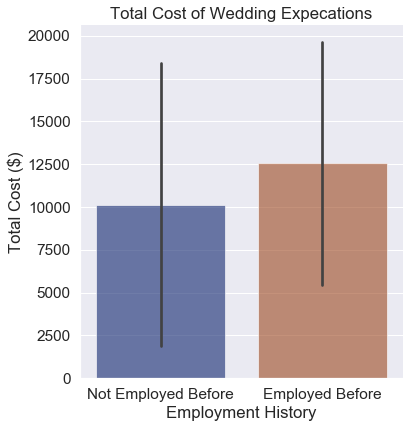

In [59]:
sns.catplot(data=cal_data, kind="bar",x="Employment History", y="Total Cost ($)",ci="sd", palette="dark", alpha=.6, height=6)

emp_tot_cost_graph = plt.gcf()
plt.title('Total Cost of Wedding Expecations')

This bar graph displays the total cost of a wedding per user in regards to their employment history. Notice that respondents who have been employed at some point in their lives have on average higher total wedding costs over those who have not been employed before. This can be seen through the general range of responses shown in this bar graph as we see that the minimum total cost for people who have never been employed is approximately $1,800 and the maximum total cost was approximately $18,000, while the minimum total cost for people who have been employed before is approximately $5,000 and the maximum total cost was approximately $20,000.

Since our survey data revealed that people who have been employed before or are currently working have higher demand for the cost of their wedding than people who have never been employeed before. We believe this is because those who have been employeed before are more likely to be financially literate and and stable, thus resulting in a higher expectation for their wedding costs.

# Results

Over the past 5 years, wedding costs are increasing due to both the growing wedding economy and the increase in people's expectations and demands for their weddings.

### Wedding Data from Robbins Brothers

Based on the Wedding Data from Robbins Brothers, average engagement ring spending is increasing, while average her band and his band spending is decreasing. We also learned that through the SD, LA, and Riverside counties, the wedding costs trends are nearly identical. This gave us leeway for gathering valuable wedding survey data throughout SoCal, California.

### Business Dataset

Based on the Business Dataset, most businesses indicated that there is an increase of weddings expectations and demands amongst couples, leading to the increase of wedding costs. Below are 3 excerpt from businesses who directly responded to our research question: each of which offers a unique insight to the wedding industry.

From a business who answered the question with the growing Economy as the cause for increasing Wedding Costs: 

"Increased costs have come from increased wages and labor predominantly. As well as increase prices from our distributors. Also with the huge flux of street vendors and food trucks taking away business from pure catering companies. It reduces the amount of weddings a caterer has done in the past. On that not we still have fixed cost to pay (rents, insurances, ect) So increased cost are necessary because of the supply and demand chain. This year along we jumped from a 22 percent service fee from 20. When we started 8 years ago we were at 17%. It also comes when you have a proven brand you can charge more."

From a business who answered the question with the people's growing Expectations as the cause for increasing Wedding Costs: 

"Weddings costs have grown for a number of reasons but its not just because the word “wedding is attached.” That is a huge myth. With the explosive growth of social media over the past 5 years in how the wedding industry uses it and couples’ consume it, expectations for what’s possible for weddings have grown with it. An immense amount of inspiration and options are at couples’ fingertips and the desire to have “Instagram-able moments” at their wedding has been an important aspect of the overall experience. Wedding budgets have grown because expectations and wants have grown. Weddings have a higher level of financial investment due to the emotional and personal aspects of a wedding than say, a backyard BBQ, which then correlates to the need for higher service and product quality levels to meet those expectations."

From a business who answered the question with both: 

"Pricing has definitely gone up the past 5 years but there are many factors with that as well. We increase wedding pricing each year for a multitude of reasons including package inclusions, food cost, demand as well as any clubhouse renovations (flooring, paint, light fixtures, furniture, etc.). In 2015 our wedding packages ranged from $68++ per person to $112++ per person and now they range from $78++ per person to $128++ per person. We typically take about a $2 increase each year and increase our food and beverage minimums as well. The wedding economy ebbs and flows but people’s expectations are always growing given that we are living in a Pinterest world. We ultimately are increasing pricing each year to stay in line with the competition, ensure we are meeting and covering our costs and including enough to make the clients happy."

### Survey Dataset

For survey data we got 168 responses to determine the expected cost of weddings, but the resulting costs are severely underestimated. Most of the respondents did not choose the highest option, in fact, most choose one of the two lowest options. For example, based on the Wedding Data from Robbins Brothers, we know that average engagement ring spending per wedding in Socal (LA, Riverside, San Diego) is currently around $4,100. However, we found in the survey that people's engagement ring cost demands average around $1.5-2 k. This mirrors the findings by the WeddingWire 2020 report stating that when planning for one's wedding, initial budgets are undershot in comparison to typical final budgets. This pattern encompasses much of the other aspects of wedding costs. In particular, survey-takers severely underestimate the cost of venues, results averaging around $2,000. On the WeddingWire 2020 report, the average wedding cost of venues in 2019 turned out to be $10,500.

One factor that might have influenced this result is that most of the respondents are UCSD students. Typically we expect students to not have considered the cost of their wedding prior to filling out the survey, and therefore leading to the underestimating. Even those that are not students are most likely taking this survey in a cold setting, where they are not familiar with the cost of weddings. In addition, another factor that might have influenced the result is that we do not cover all possible cost or service/item categories.

In order to potentially make the data more accurate, we might want to survey only those in the middle or just finished planning their wedding. Possible confounds that influence the survey data to be lower budget are the large majority of students and Californians surveyed. Most students (or younger people) are more likely to have poor financial planning due to lack of understanding/exposure and be influenced by social media. Therefore, this leads to higher overall wedding cost due to more wants due to social media and undershooting prices (they spend more money because they underestimate).

There is a correlation between employment status and expected wedding cost since in our survey data we saw a higher expected wedding cost for those that are employed compared to those that are not. We expected the students to undershoot because wedding planning is not in their immediate future so they are more likely to be practical than emotionally driven. We believe why wedding budget increases are due to emotions becoming a more prominent factor as well as the sense of urgency to have your perfect wedding overtake reasoning and practicality. However, we did not determine there was a direct causal relationship due to the lack of substantial data/evidence and also the complex nature of the relationship (i.e. many possible confounding variables).

# Ethics & Privacy

### Question asked:

Our question is somewhat posed in a way that assumes answers. We focus on comparing two main causes, the growing economy versus people's growing wedding expectations, and thus, we might have posed leading questions to both businesses in our Businesses dataset and individuals in our Survey dataset. To mediate this, we left the responses of businesses wide open in order to gain more insight on the causes. We might be inadvertently tracking differences of wedding estimations instead of direct demand and expectations of weddings, as we learned in the Background and Prior Work that many people don't often correctly estimate the costs of weddings. We believe it is possible to answer this question well, but given the limitations of time and data, we settled on exploring the two main causes.

### Implications:

Stakeholders involved in our data science topic include all the wedding businesses that we have both contacted, and those we have not. By exploring and answering our research question, we could be affecting their business sales. If people find out that prices are rising due to increasing demands and expectations, they might lessen their wedding expectations, be inspired to have a smaller or less expensive wedding, or omit certain wedding traditions and services altogether. This could severely impact wedding businesses if information is communicated in the wrong way. The information we gain should not be able to be co-opted for nefarious purposes, because we do not draw any classificatory conclusions or depend on personal demographics for our question to be answered.

### Data collected / used:

The data we collected was through informed consent. We contacted businesses to offer business insights if they so chose to, and the survey data we collected from individuals online was also through voluntary means. For the Wedding Data from Robbins Brothers, as it is wedding statistic data, it does not directly answer the question but it did give us vital information about the trends of the wedding, engagement rings, and wedding bands through the past decade. This allowed us to contextualize our research question and explore causes for the trends. There are thousands of survey samples taken into account in the Wedding Data from Robbins Brothers, so we believe the wedding costs trends we collected were reliable inferences. There are no inherent biases or privacy concerns in the dataset because it is all numbers of wedding statistics, stripped of all personally identifiable information. However, some of the data was collected through surveys, so we do not know the degree of bias in those data. We used the data from LA, Riverside, and SD areas since we wanted to focus our question's location scope on the areas we would be able to get the most Survey data from, SoCal.

For the Businesses dataset, we also contacted wedding businesses in the same location scope as the Wedding Data from Robbins Brothers. The data we received is directly related to the question, but also might've been biased because each business' perspective is different. We believe we have enough information from these businesses to make reliable inferences, especially because they were in the business for over 5 years and have had to investigate our research question themselves too to compete with other businesses. To guarantee the business' privacy, we only use the type of business and main cause of wedding costs trends columns for visualizations, and drop the name of the business and their word-for-word response columns.

For the Survey dataset, we sent out a public Google Form and used the wedding cost expectations-related data. We only use demographic information in order to check if our survey responses are representative of the population. While the number of observations we collected was decent, in order to properly make reliable inferences, we could use more individual responses in diverse ethnic groups and age ranges. Since the dataset came from a Survey, there might be biases in the answers. We guarantee privacy by removing the demographic information from the data analysis.

### Analysis and Post-analysis

Our analysis concludes that the increased costs of weddings are caused by social media, since the rise of social media has led to higher expectations. However, though social media may be correlated with higher expectations for weddings, it may not be a direct cause for an increase in overall wedding costs.

Furthermore, in our analysis, we found that age and employment were correlated with a participants’ expected wedding budget, as younger people who have not been employed before may have been undershooting their wedding budget. Though our data may have shown this trend, it may be the case that neither age nor employment had an effect on a person’s expected budget, rather both groups may have been undershooting their wedding budgets, but those who were older and employed have higher incomes and therefore can choose higher price ranges.

Some variables that may have affected our analysis include the use of social media, rising wedding costs in general, and an increase in options for wedding services. A hidden variable within our data that may have affected our analysis is the location we chose. Since our data was focused heavily on Southern California, it may have been impacted by the economic inequalities and standards for California. This may mean that our analysis may not yield the same results in other regions of the U.S.

# Conclusion & Discussion

For the economy, multiple components contribute to an increase in weddings. These factors include wages, expenses, and competition. Increased cost of labor (increasing wage) has led to an increase in wedding cost since it is a very service based industry. In addition to services, increased prices from distributors have contributed to the cost. Another factor is increased competition in the catering category; with the huge influx of street vendors and food trucks taking away business from pure catering companies it leads to a reduction in demand for the amount of caterers compared to the past. Therefore, it leads to an increased cost of caterers. As seen from one business we contacted who stated “This year alone, we jumped to a 22% service fee from 20%. When we started 8 years ago we were at 17%.” Therefore, increased costs are necessary because of the supply and demand chain.

Expectations also contribute to increased wedding costs. The main factor that has led to higher expectations in recent years is social media. With the explosive growth of social media over the past 5 years and couples’ consumption of these content, expectations for what’s possible for weddings have grown with it. Social media increases societal expectations (i.e. instagram) and creates more wants (i.e. pinterest). An immense amount of inspiration and options are at couples’ fingertips and the desire to have “Instagram-able moments” at their wedding has been an important aspect of the overall experience. Wedding budgets have grown because expectations and wants have grown. Weddings have a higher level of financial investment due to the emotional and personal aspects of a wedding than say, a backyard BBQ, which then correlates to the need for higher service and product quality levels to meet those expectations.

In conclusion, wedding costs have increased because of both the economy and expectations. Pricing has gone up the past years due to many factors like competition, labor, package inclusions, and food cost. People’s expectations are always growing due to social media like Instagram and Pinterest. Wedding prices are ultimately increasing each year due to economics factors and increasing expectations.

# Team Contributions

Unlisted sections completed were done as a team efffort

Angela Wang: researched the Twitter and Reddit API (did not end up using), created the survey, cleaned the survey data

Vivian Chiong: Ethics and Privacy section, business data collection, cleaning and visualizations for Business and Wedding Data from Robbins Brothers

Peony Lum: researched the Twitter and Reddit API (did not end up using), created the survey, business data collection, created visualizations for the survey

Alan Tram: cleaned the wedding data and created visualizations for the wedding data. Pivoted the research question when initial project ideas were undoable given API challenges